# Model Training #

### 1.1 Import Data and Required Packages ###
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library. ####

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the CSV Data as Pandas DataFrame ###

In [3]:
student_data = pd.read_csv('exams.csv')

### Show Top 5 Records ###

In [4]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


### Preparing X and Y variables ###

In [5]:
X = student_data.drop(columns=['math score'],axis=1)

In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group D,some college,standard,completed,70,78
1,male,group D,associate's degree,standard,none,93,87
2,female,group D,some college,free/reduced,none,76,77
3,male,group B,some college,free/reduced,none,70,63
4,female,group D,associate's degree,standard,none,85,86


In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(student_data['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(student_data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(student_data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(student_data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(student_data['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in'parental level of education' variable: ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['completed' 'none']


In [8]:
y = student_data['math score']

In [9]:
y

0      59
1      96
2      57
3      70
4      83
       ..
995    77
996    80
997    67
998    80
999    58
Name: math score, Length: 1000, dtype: int64

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)


In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training ###

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.4825
- Mean Absolute Error: 4.3972
- R2 Score: 0.8718
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9951
- Mean Absolute Error: 4.0735
- R2 Score: 0.8870


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.7208
- Mean Absolute Error: 5.4576
- R2 Score: 0.8074
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8090
- Mean Absolute Error: 5.3757
- R2 Score: 0.7900


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.4721
- Mean Absolute Error: 4.3883
- R2 Score: 0.8723
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9874
- Mean Absolute Error: 4.0732
- R2 Score: 0.8873


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7228
- Mean Absolute Error: 4.5365
- R2 Score: 0.8604
-----------------------

### Results ###

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.887328
0,Linear Regression,0.886980
7,CatBoosting Regressor,0.874470
5,Random Forest Regressor,0.853916
6,XGBRegressor,0.826102
8,AdaBoost Regressor,0.824488
3,K-Neighbors Regressor,0.810209
1,Lasso,0.789992
4,Decision Tree,0.742191


### Linear Regression ###

In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.70


### Plot y_pred and y_test ###

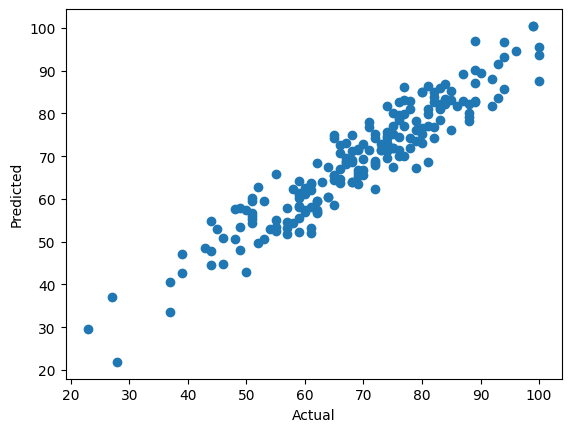

In [18]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


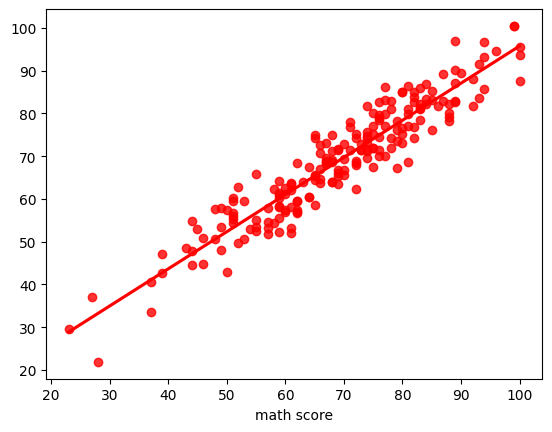

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values ####

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,67,68.250000,-1.250000
737,78,81.156250,-3.156250
740,39,42.765625,-3.765625
660,70,69.375000,0.625000
411,90,89.406250,0.593750
...,...,...,...
408,100,87.515625,12.484375
332,66,70.718750,-4.718750
208,66,63.718750,2.281250
613,68,64.078125,3.921875
